## P1 - Growth of bacteria in well mixed conditions

The core of the COMETS methodology is the Dynamic Flux Balance Analysis algorithm [ref Madahevan] (Methods). One of the first successful simulations of the time dynamics of bacterial metabolism was the classical study of E. coli batch culture by Varma and Palsson [ref. 1994]. Here we reproduce one of results in the study, the anaerobic fermentation in minimal media with glucose as the only carbon source. 

We used the rudimentary "core model" of E. coli [ref. Orth et al. 2009], which can be downloaded at http://bigg.ucsd.edu/models/e_coli_core. This model consists only of a small subset of the reactions present in the metabolic network of E. coli. However, it is sufficiently complex to reproduce some of the fundamental metabolic activities in a bacterial cell, such as glycolysis, TCA cycle, pentose phosphate shunt, etc. 

The spatial layout in this elementary case consists of a single grid point of 1cm^3 volume, thus modeling well mixed, i.e. spatially trivial conditions. We seeded the batch culture with 5e-6 grams of E. coli biomass. The initial composition of the substrate was 11mM of glucose  and infinite amounts of ammonia and phosphate. The nutrient uptake was modeled with the standard Michaelis-Menten kinetics, using the typical Monod parameter for anaerobic uptake of glucose by E. coli.

In [1]:
# Start by loading required packages, including the COMETS toolbox
import comets as c
import matplotlib.pyplot as plt

# create an empty layout
# The default grid size is 1X1, which means only one grid "cell"
world = c.layout()

# Add glucose and remove o2 
world.set_specific_metabolite('glc__D_e', 0.011)
world.set_specific_metabolite('o2_e', 0)

# Add the rest of nutrients unlimited
world.set_specific_metabolite('nh4_e',1000);
world.set_specific_metabolite('pi_e',1000);
world.set_specific_metabolite('h2o_e',1000);
world.set_specific_metabolite('h_e',1000);

building empty layout model
models will need to be added with layout.add_model()
Academic license - for non-commercial use only

Running COMETS simulation ...
Done!


In [ ]:
# load the model 
p = c.model('test_models/e_coli_core.xml')
p.change_bounds('EX_glc__D_e', -1000, 1000)

# set its initial biomass, 5e-6 gr at coordinate [0,0]
p.initial_pop = [0, 0, 5e-6]

# add it to the world
world.add_model(p)

In [ ]:
# Set the parameters that are different from the default
sim_params = c.params()
sim_params.all_params['defaultVmax'] = 18.5
sim_params.all_params['defaultKm'] = 0.000015
sim_params.all_params['maxCycles'] = 1000
sim_params.all_params['timeStep'] = 0.01
sim_params.all_params['spaceWidth'] = 1
sim_params.all_params['maxSpaceBiomass'] = 10
sim_params.all_params['minSpaceBiomass'] = 1e-11
sim_params.all_params['writeMediaLog'] = True

In [ ]:
# Initialize the comets object and run the simulation
well_mixed = c.comets(world, sim_params)
well_mixed.run()

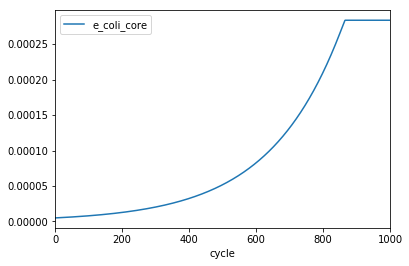

In [2]:
well_mixed.total_biomass.plot(x = 'cycle')

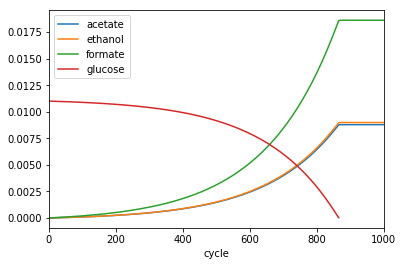

In [10]:
media = well_mixed.media.copy()
media = media[media.conc_mmol<900]

fig, ax = plt.subplots()
media.groupby('metabolite').plot(x='cycle', ax =ax, y='conc_mmol')
ax.legend(('acetate','ethanol', 'formate', 'glucose'))